## Predicting Employee Attrition Using Machine Learning

In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys,traceback

In [ ]:
hr_data=pd.read_csv('train.csv')

In [ ]:
#Import Data
hr = hr_data
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'Attrition']

Sample data:


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [ ]:
hr=hr.rename(columns = {'Department':'department'})
#Display data type for each column
hr.dtypes


satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
Attrition                   int64
dtype: object

In [ ]:
#Check for Missing Values
hr.isnull().any()


satisfaction_level        False
last_evaluation_rating    False
projects_worked_on        False
average_montly_hours      False
time_spend_company        False
Work_accident             False
promotion_last_5years     False
department                False
salary                    False
Attrition                 False
dtype: bool

In [ ]:
#Dimensions of our dataset
hr.shape

(25491, 10)

In [ ]:
#Summary for each variable
hr.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#To get the unique values for department
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
#Combine "technical","support" and "IT" into one department
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [ ]:
#Print the updated values of departments
print(hr['department'].unique())


['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


# Data Exploration

In [ ]:
hr['Attrition'].value_counts() # 0 rep stay in company. 1 rep left company.

0    19501
1     5990
Name: Attrition, dtype: int64

In [ ]:
hr.groupby('Attrition').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Attrition,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341


Some observations:
* Those who stayed in the company has a higher satisfaction level than those who left.
* If statisfaction level < 5, employee likely to leave
* Those who were promoted in the last 5 years are more likely to stay than leave

In [ ]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.034457,0.153558
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.018237,0.265957
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.021412,0.283902
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.111528,0.134958
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.050172,0.229553
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.000000,0.218626
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.023519,0.240212
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.008798,0.245317


In [ ]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
salary,,,,,,,,
high,6.386124,7.049012,4.170743,203.784102,3.686736,0.153340,0.060207,0.066792
low,6.019963,7.180714,4.215674,205.429090,3.441506,0.144884,0.008385,0.291945
medium,6.222742,7.176300,4.223226,205.417351,3.523353,0.145868,0.028644,0.203156


Observation: the higher the salary, the higher the satisfaction level, as we would expect (based on the latest satisfaction level)

## Data Visualization

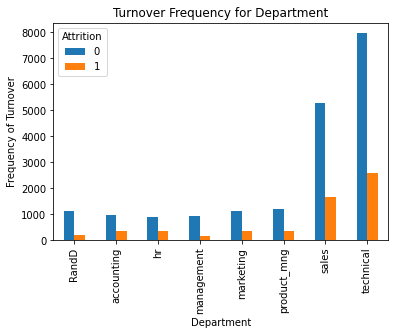

In [ ]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(hr['department'],hr['Attrition']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

Observation: Majority of those who left the company are from technical and sales department

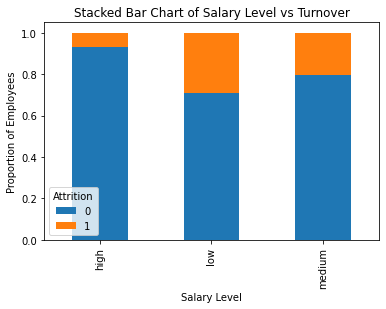

In [ ]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(hr.salary, hr.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

Observation: those with lower salary tend to leave the company as compared to those with higher salary

In [ ]:
#Proportion of employees left by department
pd.crosstab(hr.department, hr.Attrition)

Attrition,0,1
department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


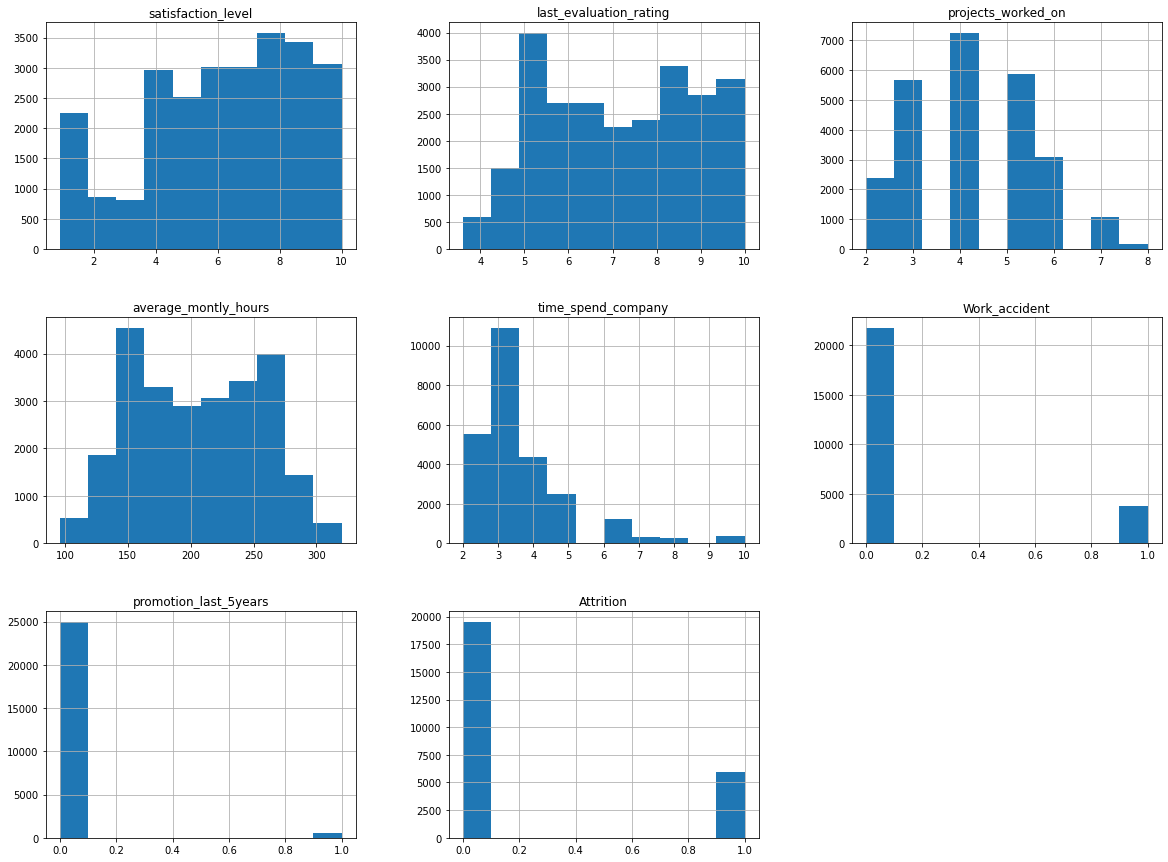

In [ ]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [ ]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [ ]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [ ]:
hr.drop(hr.columns[[7, 8]], axis=1, inplace=True)

In [ ]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'Attrition',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [ ]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,8.0,8.6,6,272,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1.1,8.8,8,282,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3.7,5.2,3,169,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,4.1,5.0,3,163,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
hr_vars=hr.columns.values.tolist()
y=['Attrition']
X=[i for i in hr_vars if i not in y]

In [ ]:
X

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

## Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10) # top 10 columns
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 3 2 9 1 1 1 1 4 1 1 6 8 7 5 1 1 1]


In [ ]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'Attrition',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

Now, need to pick out the columns where the value true was given from the RFE

In [ ]:
cols=['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'] 
X=hr[cols]
y=hr['Attrition']

### Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.766


### Random Forest

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.964


### Support Vector Machine

In [ ]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.891


### XGBoost Classifier 

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print('XGBoost accuracy: {:.3f}'.format(accuracy_score(y_test, xgb.predict(X_test))))

XGBoost accuracy: 0.957


### 10 Fold Cross Validation

In [ ]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

cross validation average accuracy for Random Forest Classifier: 0.962


In [ ]:
#For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

cross validation average accuracy for SVM Classifier: 0.891


In [ ]:
#For XGBoost
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for XGBoost Classifier: %.3f" % (results.mean()))

cross validation average accuracy for XGBoost Classifier: 0.956


### Classification Report

In [ ]:
#Classification report for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.91      0.94      0.93      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.96      0.95      7648
weighted avg       0.96      0.96      0.96      7648



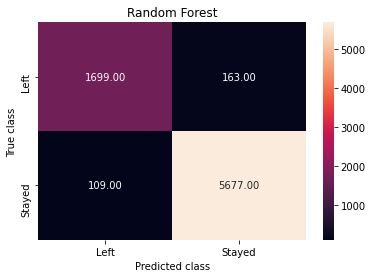

In [ ]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [ ]:
#Classification report for Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      5840
           1       0.51      0.26      0.34      1808

    accuracy                           0.77      7648
   macro avg       0.66      0.59      0.60      7648
weighted avg       0.73      0.77      0.74      7648



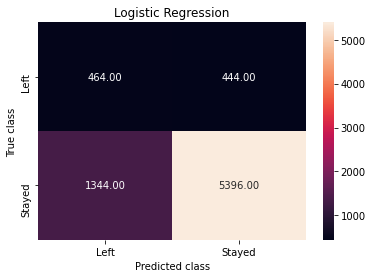

In [ ]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [ ]:
#Classification report for SVM
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5840
           1       0.75      0.82      0.78      1808

    accuracy                           0.89      7648
   macro avg       0.84      0.87      0.85      7648
weighted avg       0.90      0.89      0.89      7648



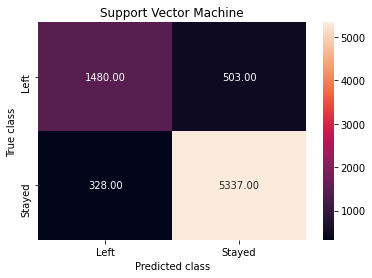

In [ ]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [ ]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5840
           1       0.90      0.92      0.91      1808

    accuracy                           0.96      7648
   macro avg       0.94      0.94      0.94      7648
weighted avg       0.96      0.96      0.96      7648



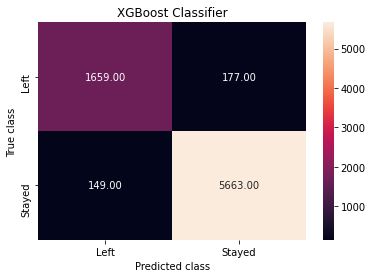

In [ ]:
#Confusion Matrix for XGBoost Classifier
xgb_y_pred = xgb.predict(X_test)
xgb_cm = metrics.confusion_matrix(xgb_y_pred, y_test, [1,0])
sns.heatmap(xgb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBoost Classifier')
plt.savefig('XGBoost_Classifier')

### Variable Importance for Random Forest Classifier

In [ ]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.36%
department_hr-0.37%
department_RandD-0.41%
salary_medium-0.42%
promotion_last_5years-0.46%
salary_high-0.79%
salary_low-0.98%
Work_accident-2.31%
time_spend_company-32.16%
satisfaction_level-61.75%


### Variable Importance for XGBoost Classifier

In [ ]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
importance = xgb.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.63%
salary_medium-1.86%
department_hr-1.94%
department_RandD-2.10%
promotion_last_5years-3.16%
salary_low-6.15%
salary_high-6.42%
Work_accident-9.79%
time_spend_company-29.23%
satisfaction_level-38.71%


## Hyperparameter Tuning

(random forest classifier used as has the highest accuracy)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf.best_score_

0.9653605954013245

In [ ]:
rf.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}